In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch import optim

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 10
step = 0.2
X = torch.arange(start,end,step).unsqueeze(dim = 1)
Y = weight*X + bias

In [3]:
Y[:10],X[:10]

(tensor([[0.3000],
         [0.4400],
         [0.5800],
         [0.7200],
         [0.8600],
         [1.0000],
         [1.1400],
         [1.2800],
         [1.4200],
         [1.5600]]),
 tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000],
         [1.0000],
         [1.2000],
         [1.4000],
         [1.6000],
         [1.8000]]))

In [4]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],Y[:train_split]
X_test,y_test = X[train_split:],Y[train_split:]

len(X_train),len(y_train),len(y_test),len(X_test),


(40, 40, 10, 10)

In [19]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    import matplotlib.pyplot as plt
    import numpy as np
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

    if predictions is not None:
        # Convert predictions tensor to numpy array
        predictions_np = predictions.detach().numpy() if isinstance(predictions, torch.Tensor) else predictions
        plt.scatter(test_data, predictions_np, c='r', s=4, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.title("Train/Test Data and Predictions")
    plt.show()


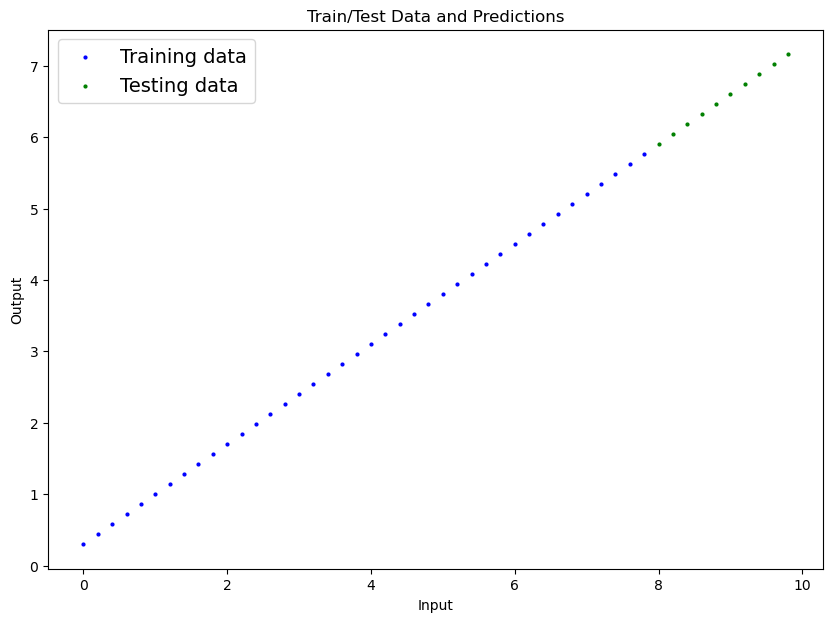

In [54]:
plot_prediction()

In [6]:
"""class LinearRegression(nn.Module):
    def __init__(self): #inside the constructors initialize the layers and Model parameters
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1,dtype = torch.float),requires_grad = True)

    def forward(self,x:torch.Tensor)-> torch.Tensor:
        return self.weights*x + self.bias"""


# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

   
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias        

In [7]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

list(model_0.parameters())

"""# Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())"""


'# Set manual seed since nn.Parameter are randomly initialized\ntorch.manual_seed(42)\n\n# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))\nmodel_0 = LinearRegressionModel()\n\n# Check the nn.Parameter(s) within the nn.Module subclass we created\nlist(model_0.parameters())'

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
X_test

tensor([[8.0000],
        [8.2000],
        [8.4000],
        [8.6000],
        [8.8000],
        [9.0000],
        [9.2000],
        [9.4000],
        [9.6000],
        [9.8000]])

In [10]:
with torch.inference_mode():
    y_pred = model_0(X_test)

In [11]:
with torch.no_grad():
    y_pred1 = model_0(X_test)

In [12]:
abs(y_pred - y_pred1)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [13]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.01)

In [26]:
epochs = 60

for epoch in range(epochs):
    
    model_0.train()

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate Loss 
    loss = loss_fn(y_pred, y_train)
    #print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    model_0.eval()
    #Testing Loop
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    print(f"Epoch: {epoch} | Test Loss: {test_loss}") 
    print(model_0.state_dict())


Epoch: 0 | Test Loss: 0.014234161004424095
OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2903]))])
Epoch: 1 | Test Loss: 0.3428657650947571
OrderedDict([('weights', tensor([0.7385])), ('bias', tensor([0.3003]))])
Epoch: 2 | Test Loss: 0.014234161004424095
OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2903]))])
Epoch: 3 | Test Loss: 0.3428657650947571
OrderedDict([('weights', tensor([0.7385])), ('bias', tensor([0.3003]))])
Epoch: 4 | Test Loss: 0.014234161004424095
OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2903]))])
Epoch: 5 | Test Loss: 0.3428657650947571
OrderedDict([('weights', tensor([0.7385])), ('bias', tensor([0.3003]))])
Epoch: 6 | Test Loss: 0.014234161004424095
OrderedDict([('weights', tensor([0.6995])), ('bias', tensor([0.2903]))])
Epoch: 7 | Test Loss: 0.3428657650947571
OrderedDict([('weights', tensor([0.7385])), ('bias', tensor([0.3003]))])
Epoch: 8 | Test Loss: 0.014234161004424095
OrderedDict([('weights', tensor([0.69

In [27]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.7385])), ('bias', tensor([0.3003]))])

In [16]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)
    

In [17]:
y_pred_new

tensor([[6.1948],
        [6.3425],
        [6.4901],
        [6.6377],
        [6.7854],
        [6.9330],
        [7.0807],
        [7.2283],
        [7.3759],
        [7.5236]])

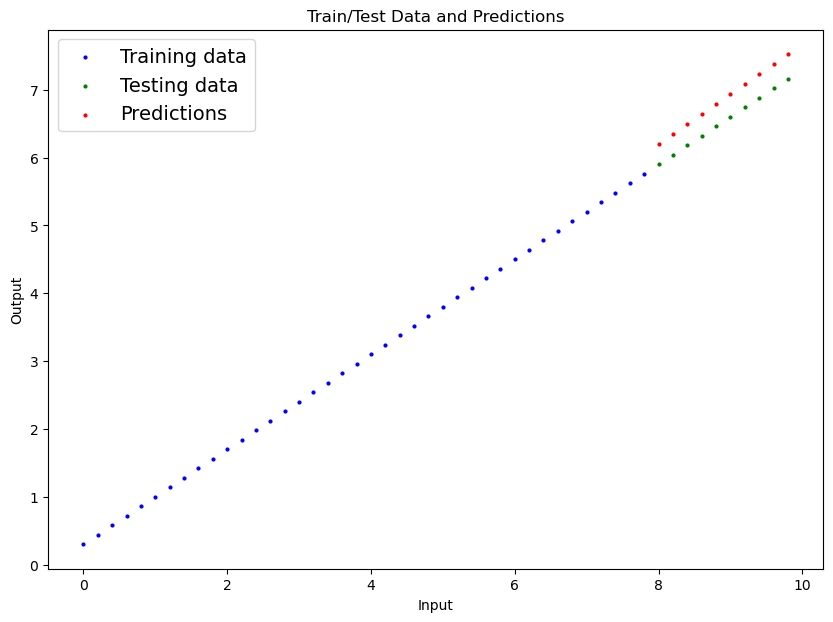

In [28]:
plot_prediction(predictions=y_pred_new)

In [21]:
with torch.no_grad():
    list(model_0.parameters())

In [30]:
#Saving a Model
"""There are 3 main methods for saving and Loading Model in pytorch
1.torch.save() - Save a pytorch object in Python Pickle format
2.torch.load() - load a saved pytorch object
3.torch.nn.Module.load_state_dict() - load Model's saved state"""

"There are 3 main methods for saving and Loading Model in pytorch\n1.torch.save() - Save a pytorch object in Python Pickle format\n2.torch.load() - load a saved pytorch object\n3.torch.nn.Module.load_state_dict() - load Model's saved state"